Exclusive/Hard clustering techniques:
- **Partitional Clustering**: produces one single partition of data
- **Hierarchical Clustering**: create a nested sequence of partitions

The term exclusive refers to the fact that in each partition, each data item belongs to exactly one subset of that partition. This is in contrast with non-exclusive (fuzzy) clustering methods where each data item can have a degree of membership to each cluster.

### 12.1 Partitional Clustering

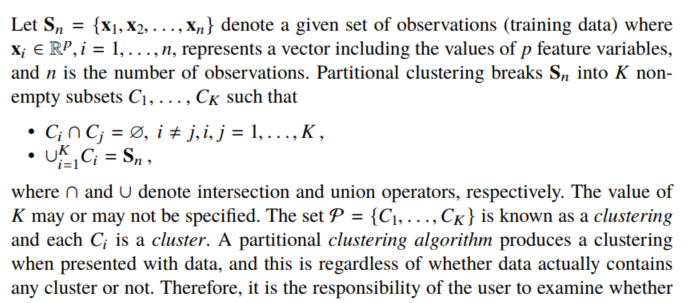

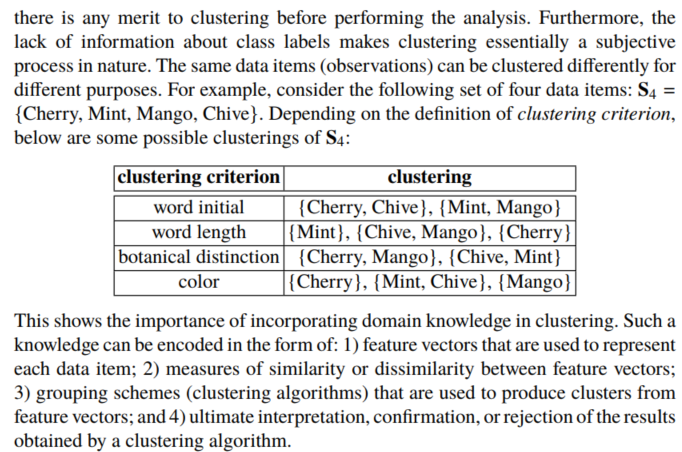

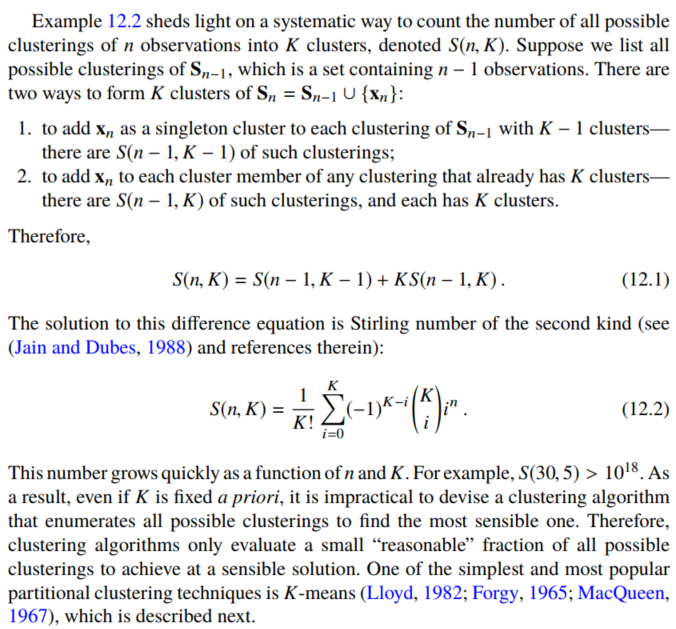

#### 12.1.1 K-Means

- Major drawback: sensitivity of K-means to initial selection of centriods. In particular, for different intial selections, the algorithm may converge to different local minima, which leads to different clusterings.
- It is typical to run the algorithm a few times and take the solution that corresponds to the least value for the criterion
- K-means++: initially designate a data point as a centroid with a probability that is proportional to its distance from the nearest centroid that is already chosen, i.e. keep the centroids sufficiently apart

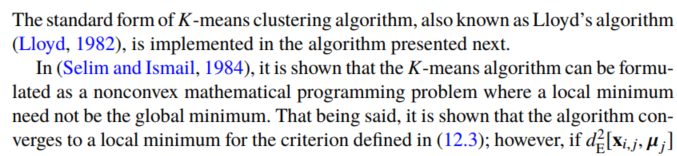

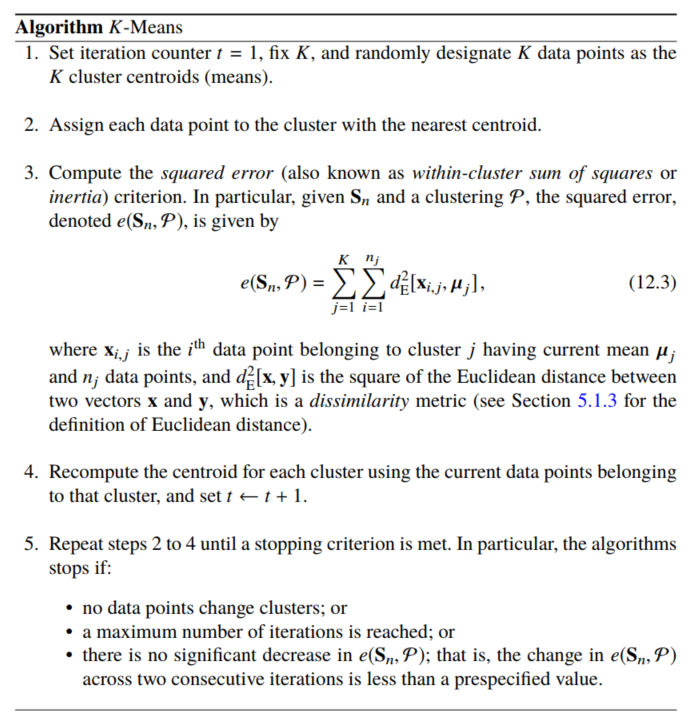

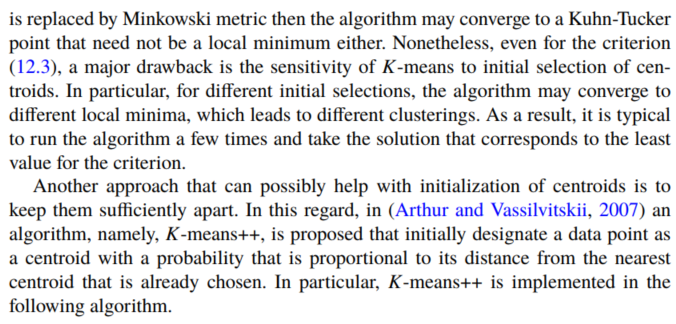

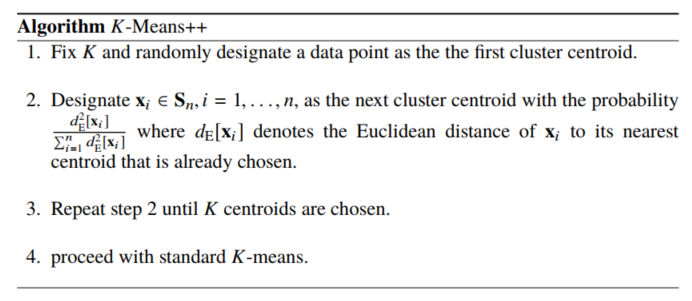

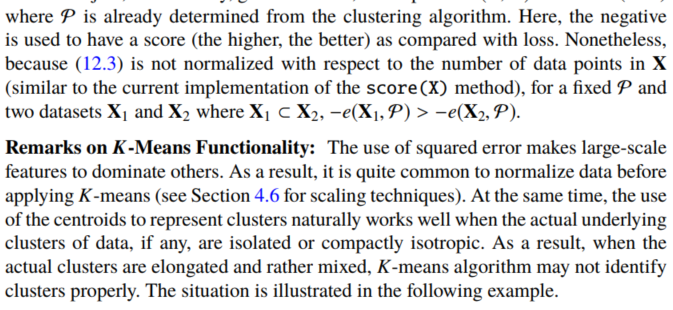

X shape = (120, 4)
The score for K=3 is -75.831


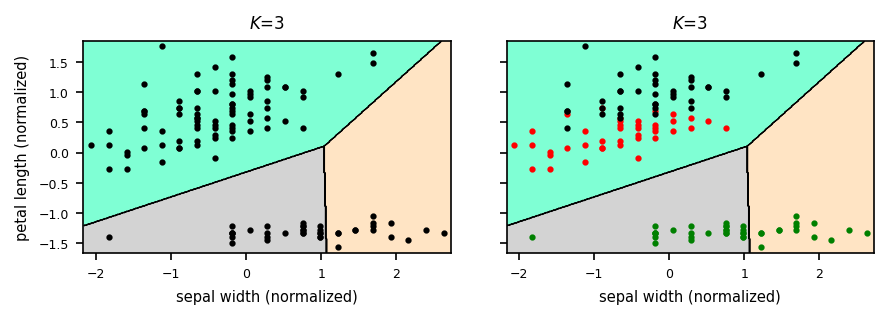

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

# loading the scaled data and selecting the two features
arrays = np.load('data/iris_train_scaled.npz')
X_train = arrays['X']
y_train = arrays['y']
print('X shape = {}'.format(X_train.shape))
X_train = X_train[:,[1,2]] # selecting the two features

# necessities for plotting cluster boundaries
color = ('bisque', 'aquamarine', 'lightgrey')
cmap = ListedColormap(color)
mins = X_train.min(axis=0) - 0.1
maxs = X_train.max(axis=0) + 0.1
x = np.arange(mins[0], maxs[0], 0.01)
y = np.arange(mins[1], maxs[1], 0.01)
X, Y = np.meshgrid(x, y)
coordinates = np.array([X.ravel(), Y.ravel()]).T
fig, axs = plt.subplots(1, 2, figsize=(6, 2), dpi = 150, sharex=True, sharey=True)
fig.tight_layout()

# training the clusterer
K = 3
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(X_train)

# plotting the cluster boundaries and the scatter plot of training data
Z = kmeans.predict(coordinates)
Z = Z.reshape(X.shape)
axs[0].tick_params(axis='both', labelsize=6)
axs[0].pcolormesh(X, Y, Z, cmap = cmap, shading='nearest')
axs[0].contour(X ,Y, Z, colors='black', linewidths=0.5)
axs[0].plot(X_train[:, 0], X_train[:, 1],'k.', markersize=4)
axs[0].set_title('$K$=' + str(K), fontsize=8)
axs[0].set_ylabel('petal length (normalized)', fontsize=7)
axs[0].set_xlabel('sepal width (normalized)', fontsize=7)

axs[1].tick_params(axis='both', labelsize=6)
axs[1].pcolormesh(X, Y, Z, cmap = cmap, shading='nearest')
axs[1].contour(X ,Y, Z, colors='black', linewidths=0.5)
axs[1].plot(X_train[y_train==0, 0], X_train[y_train==0, 1],'g.', markersize=4)
axs[1].plot(X_train[y_train==1, 0], X_train[y_train==1, 1],'r.', markersize=4)
axs[1].plot(X_train[y_train==2, 0], X_train[y_train==2, 1],'k.', markersize=4)
axs[1].set_title('$K$=' + str(K), fontsize=8)
axs[1].set_xlabel('sepal width (normalized)', fontsize=7)
print('The score for K={} is {:.3f}'.format(K, kmeans.score(X_train)))

#### 12.1.2 Estimating the Number of Clusters

Elbow Phenomenon

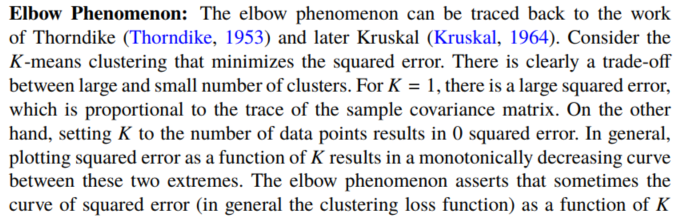

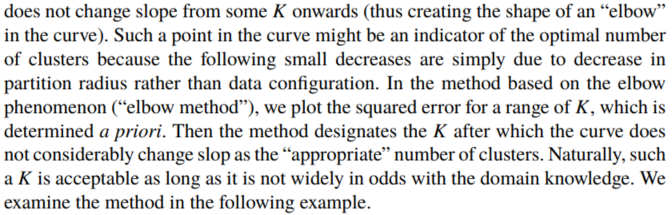

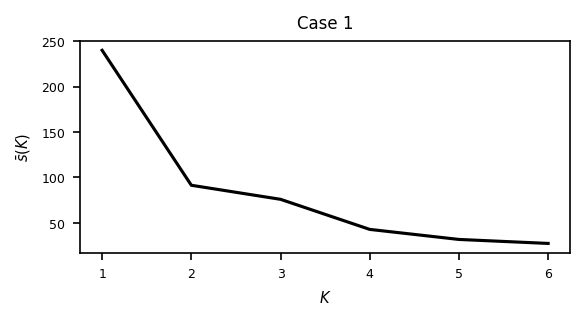

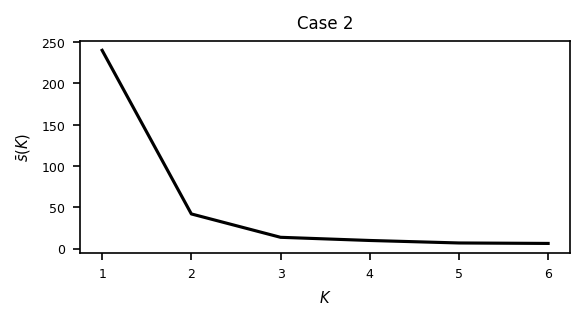

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# loading the scaled data and selecting the two features
arrays = np.load('data/iris_train_scaled.npz')
X_train_full = arrays['X']
feature_indices = [[1,2], [3,2]]
K_val = range(1,7)

for j, f in enumerate(feature_indices):
  X_train = X_train_full[:,f] # selecting the two features

  # necessities for plotting cluster boundaries
  fig, ax = plt.subplots(1, 1, figsize=(4, 2), dpi = 150)
  fig.tight_layout()

  # training the clusterer and computing the score for each K
  score = np.zeros(len(K_val))
  for i, K in enumerate(K_val):
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X_train)
    score[i] = - kmeans.score(X_train)

  # plotting the the overall average silhouette width as a function
  ax.tick_params(axis='both', labelsize=6)
  ax.plot(K_val, score,'k-', markersize=4)
  ax.set_ylabel(r'$\bar{s}(K)$', fontsize=7)
  ax.set_xlabel('$K$', fontsize=7)
  ax.set_title('Case ' + str(j+1), fontsize=8)


Silhouette Coefficient

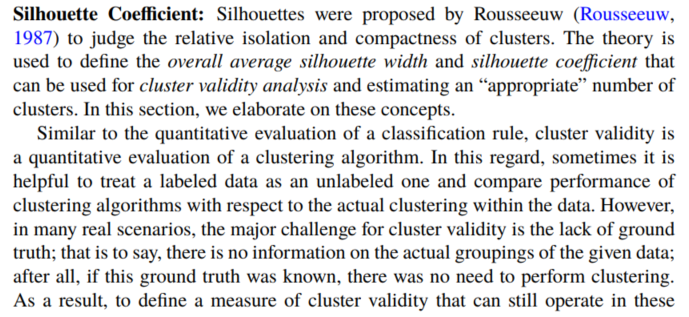

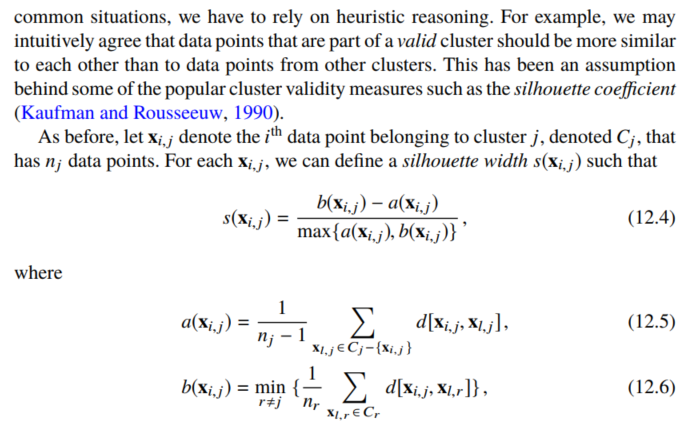

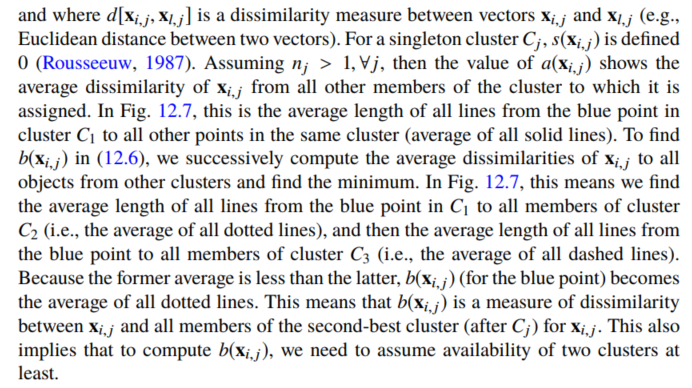

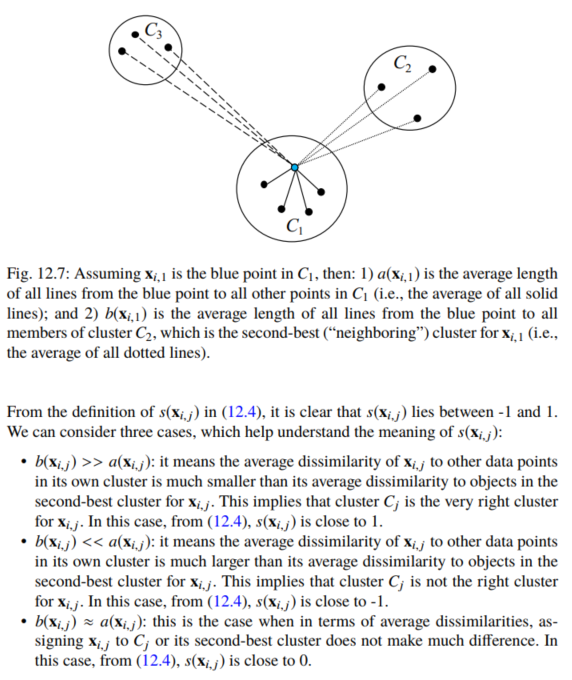

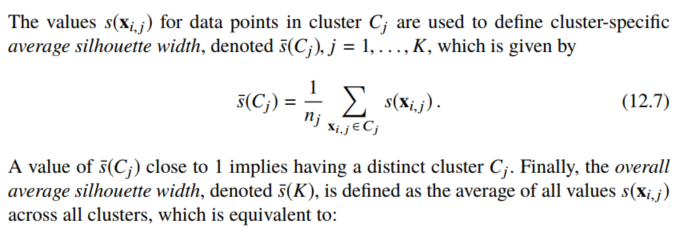

One way to select an appropriate number of clusters is to find the $K$ that maximized $\bar{s}(K)$, this maximum value is known as *silhouette coefficient*

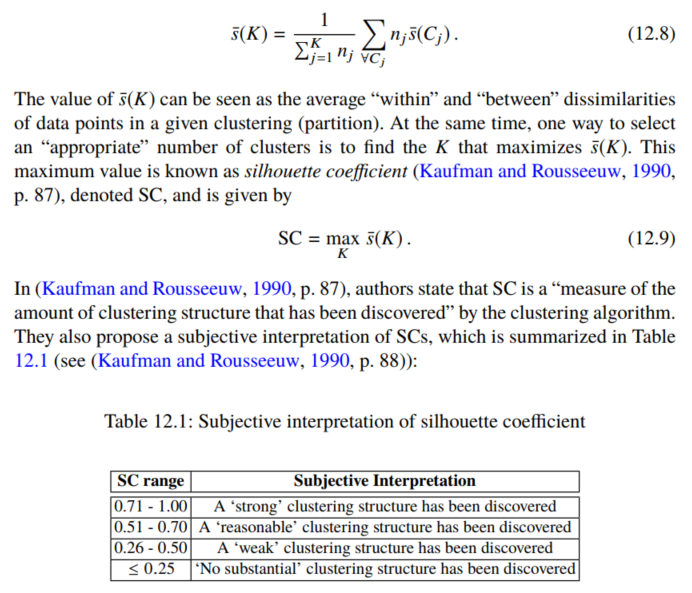

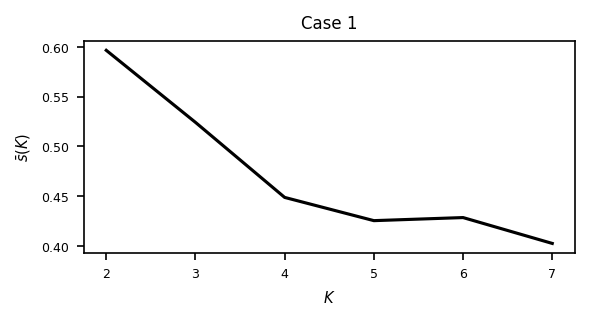

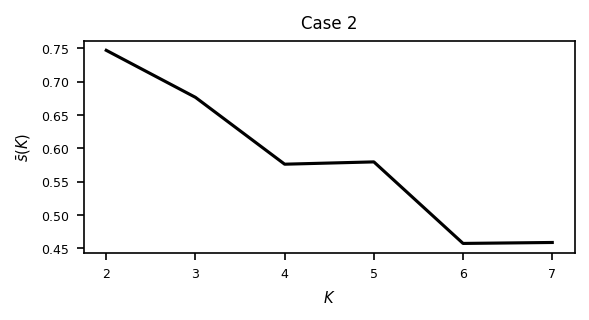

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# loading the scaled data and selecting the two features
arrays = np.load('data/iris_train_scaled.npz')
X_train_full = arrays['X']
feature_indices = [[1,2], [3,2]]
K_val = range(2, 8)

for j, f in enumerate(feature_indices):
  X_train = X_train_full[:,f] # selecting the two features

  # necessities for plotting cluster boundaries
  fig, ax = plt.subplots(1, 1, figsize=(4, 2), dpi = 150)
  fig.tight_layout()

  # training the clusterer and computing the overall average silhouette width for each K
  silh = np.zeros(len(K_val))
  for i, K in enumerate(K_val):
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X_train)
    silh[i] = silhouette_score(X_train, kmeans.labels_)

  # plotting the the overall average silhouette width as a function
  ax.tick_params(axis='both', labelsize=6)
  ax.plot(K_val, silh,'k-', markersize=4)
  ax.set_ylabel(r'$\bar{s}(K)$', fontsize=7)
  ax.set_xlabel('$K$', fontsize=7)
  ax.set_title('Case ' + str(j+1), fontsize=8)


### 12.2 Hierarchical Clustering

#### 12.2.1 Definition of Pairwise Cluster Dissimilarity

#### 12.2.2 Efficiently Updating Dissimilarities 

#### 12.2.3 Representing the Results of Hierarchical Clustering